In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
ri = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [5]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [6]:
# Analysing missing values
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [7]:
# Dropping a column 'state' 'county name'
ri.drop(['state', 'county_name'], axis='columns', inplace=True)
ri.shape

(91741, 13)

In [8]:
# Dropping rows based on the presence of missing values
ri.dropna(subset=['driver_gender'], inplace=True)
ri.shape

(86536, 13)

In [9]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [10]:
# Fixing the data type 
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [11]:
ri.is_arrested.head()

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object

In [12]:
ri['is_arrested'] = ri.is_arrested.astype('bool')
ri.is_arrested.head()

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: bool

In [13]:
# Concatenating 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [14]:
# Setting stop_datetime as index
ri.set_index('stop_datetime', inplace=True)
ri.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [15]:
# Exploring the analysis between gender and policing
ri.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

In [16]:
female = ri[ri.driver_gender == 'F']
male = ri[ri.driver_gender == 'M']
print(female.violation.value_counts(normalize=True))
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


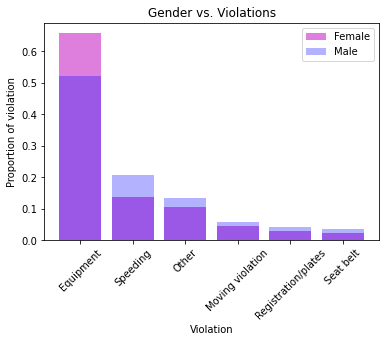

In [17]:
plt.bar(ri.violation.unique(), female.violation.value_counts(normalize=True),color='m', alpha=0.5)
plt.bar(ri.violation.unique(), male.violation.value_counts(normalize=True),color='b', alpha=0.3)
plt.xlabel('Violation')
plt.xticks(rotation=45)
plt.ylabel('Proportion of violation')
plt.title('Gender vs. Violations')
plt.legend({'Female': 'Magenta', 'Male' : 'Blue'})

In [18]:
# Computing a stop outcome of male and female for speeding
female_and_speeding = ri[(ri.driver_gender =='F') & (ri.violation == 'Speeding')]
male_and_speeding = ri[(ri.driver_gender =='M') & (ri.violation == 'Speeding')]
print(female_and_speeding.stop_outcome.value_counts(normalize=True))
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


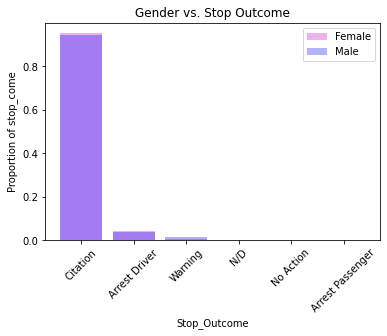

In [19]:
plt.bar(ri.stop_outcome.unique(), female_and_speeding.stop_outcome.value_counts(normalize=True),color='m', alpha=0.3)
plt.bar(ri.stop_outcome.unique(), male_and_speeding.stop_outcome.value_counts(normalize=True),color='b', alpha=0.3)
plt.xlabel('Stop_Outcome')
plt.xticks(rotation=45)
plt.ylabel('Proportion of stop_come')
plt.title('Gender vs. Stop Outcome')
plt.legend({'Female': 'Magenta', 'Male' : 'Blue'})

In [20]:
# Gender vs. Search Rate
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [21]:
# Gender vs. Search Rate based on violation
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


In [22]:
# Gender vs. Frisk rate
ri.search_conducted.value_counts()
ri.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [23]:
# Checking if search_type contains the string 'Protective Frisk', Create Frisk col. of bool dtype
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)
print(ri.frisk.sum())

303


In [24]:
# Creating a dataframe in which search was conducted
searched = ri[ri.search_conducted == True]
print(searched.frisk.mean())

0.09162382824312065


In [25]:
print(searched.groupby('driver_gender').frisk.mean())

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


0.0355690117407784


Text(0.5, 1.0, 'Hours vs. Mean Arrest Rate')

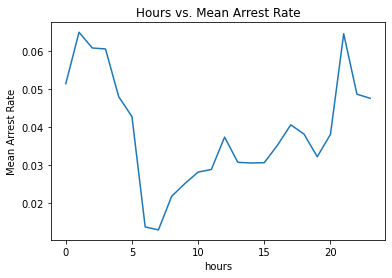

In [26]:
# time of day vs. arrest rate
print(ri.is_arrested.mean())
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()
hourly_arrest_rate.plot()
plt.xlabel('hours')
plt.ylabel('Mean Arrest Rate')
plt.title('Hours vs. Mean Arrest Rate')

Text(0.5, 1.0, 'Annual Drugs Related Stop Rate')

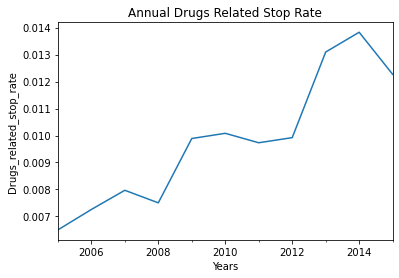

In [27]:
# Drugs related stops
# resampling the drugs related stops based on annual frequency
annual_drugs_rate = ri.drugs_related_stop.resample('A').mean()
annual_drugs_rate.plot()
plt.xlabel('Years')
plt.ylabel('Drugs_related_stop_rate')
plt.title('Annual Drugs Related Stop Rate')

Text(0.5, 1.0, 'Annual Drugs Related Stop Rate')

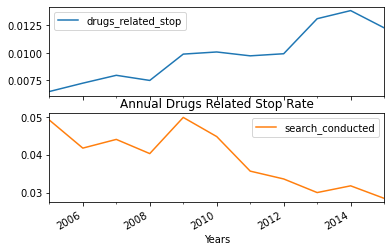

In [28]:
# Comparing drug and search rate
# resampling search rate annually
annual_search_rate = ri.search_conducted.resample('A').mean()
#concatenating drug rate and search rate as annual
annual = pd.concat([annual_drugs_rate, annual_search_rate], axis='columns')
annual.plot(subplots = True)
plt.xlabel('Years')
plt.title('Annual Drugs Related Stop Rate')

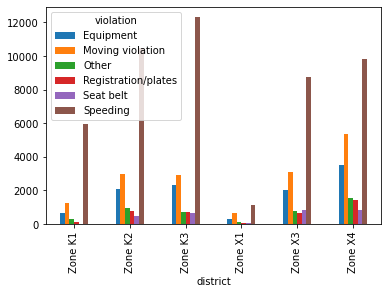

In [29]:
# Districtwise violations
all_zones = pd.crosstab(ri.district, ri.violation)
all_zones.plot(kind='bar')

In [30]:
#Stop length for violations
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min']


In [31]:
# Converting stop duration strings to integer using the mapping the dictionary
mapping = {'0-15 Min' : 8, '16-30 Min' : 23, '30+ Min' : 45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)
print(ri.stop_minutes.unique())

[ 8 23 45]


Text(0.5, 1.0, 'Avg. Stop Length per Violation')

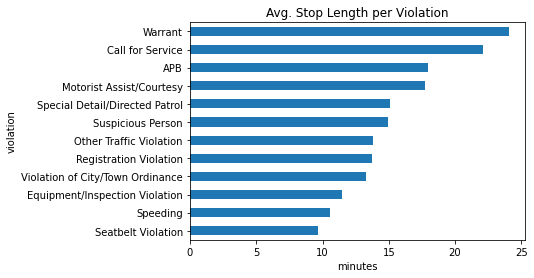

In [32]:
# Plotting stop length
stop_length = ri.groupby('violation_raw').stop_minutes.mean()
stop_length.sort_values().plot(kind='barh')
plt.xlabel('minutes')
plt.ylabel('violation')
plt.title('Avg. Stop Length per Violation')

In [63]:
# stop leangth vs gender
stop_length_gender = ri.groupby('driver_gender').stop_minutes.mean()
print(stop_length_gender)

driver_gender
F    10.846429
M    12.103311
Name: stop_minutes, dtype: float64


In [33]:
# Analysis based on race
print(ri.driver_race.unique())

['White' 'Asian' 'Black' 'Hispanic' 'Other']


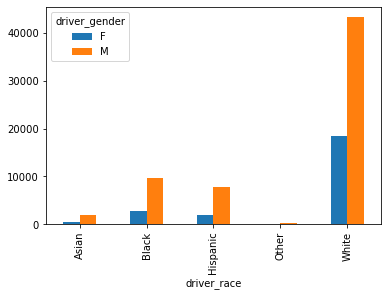

In [67]:
# Driver race vs. gender
table = pd.crosstab(ri.driver_race, ri.driver_gender)
table.plot(kind='bar')

In [36]:
# Driver race and violation type
asian = ri[ri.driver_race == 'Asian']
black = ri[ri.driver_race == 'Black']
hispanic = ri[ri.driver_race == 'Hispanic']
other = ri[ri.driver_race == 'Other']
white = ri[ri.driver_race == 'White']

In [37]:
asian.violation.value_counts(normalize = True)

Speeding               0.678108
Moving violation       0.133110
Equipment              0.091670
Other                  0.046463
Registration/plates    0.028882
Seat belt              0.021766
Name: violation, dtype: float64

In [38]:
black.violation.value_counts(normalize = True)

Speeding               0.411070
Moving violation       0.239316
Equipment              0.175254
Registration/plates    0.070737
Other                  0.066504
Seat belt              0.037118
Name: violation, dtype: float64

In [39]:
hispanic.violation.value_counts(normalize = True)

Speeding               0.335252
Moving violation       0.244783
Equipment              0.222885
Registration/plates    0.079778
Other                  0.064254
Seat belt              0.053048
Name: violation, dtype: float64

In [40]:
other.violation.value_counts(normalize = True)

Speeding               0.630189
Moving violation       0.218868
Equipment              0.052830
Other                  0.049057
Registration/plates    0.033962
Seat belt              0.015094
Name: violation, dtype: float64

In [41]:
white.violation.value_counts(normalize = True)

Speeding               0.619444
Moving violation       0.170147
Equipment              0.102909
Other                  0.045951
Registration/plates    0.032003
Seat belt              0.029546
Name: violation, dtype: float64

In [46]:
asian_and_speeding = ri[(ri.driver_race == 'Asian') & (ri.violation == 'Speeding')]
black_and_speeding = ri[(ri.driver_race == 'Black') & (ri.violation == 'Speeding')]
hispanic_and_speeding = ri[(ri.driver_race == 'Hispanic') & (ri.violation == 'Speeding')]
other_and_speeding = ri[(ri.driver_race == 'Other') & (ri.violation == 'Speeding')]
white_and_speeding = ri[(ri.driver_race == 'White') & (ri.violation == 'Speeding')]

print(asian_and_speeding.stop_outcome.value_counts(normalize=True))
print(black_and_speeding.stop_outcome.value_counts(normalize=True))
print(hispanic_and_speeding.stop_outcome.value_counts(normalize=True))
print(other_and_speeding.stop_outcome.value_counts(normalize=True))
print(white_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.963580
Warning             0.027778
Arrest Driver       0.006173
No Action           0.001235
N/D                 0.000617
Arrest Passenger    0.000617
Name: stop_outcome, dtype: float64
Citation            0.922376
Warning             0.046139
Arrest Driver       0.026337
Arrest Passenger    0.003564
No Action           0.001386
N/D                 0.000198
Name: stop_outcome, dtype: float64
Citation            0.925790
Warning             0.041092
Arrest Driver       0.028826
Arrest Passenger    0.002147
No Action           0.001840
N/D                 0.000307
Name: stop_outcome, dtype: float64
Citation     0.964072
Warning      0.029940
No Action    0.005988
Name: stop_outcome, dtype: float64
Citation            0.951337
Warning             0.036425
Arrest Driver       0.009759
N/D                 0.001148
Arrest Passenger    0.000678
No Action           0.000652
Name: stop_outcome, dtype: float64


In [48]:
print(ri.groupby('driver_race').search_conducted.mean())

driver_race
Asian       0.020511
Black       0.066992
Hispanic    0.061478
Other       0.011321
White       0.029643
Name: search_conducted, dtype: float64


In [49]:
race_vs_violation = ri.pivot_table(index='violation', columns='driver_race', values='search_conducted')
print(race_vs_violation)

driver_race             Asian     Black  Hispanic     Other     White
violation                                                            
Equipment            0.018265  0.086856  0.071033  0.000000  0.056070
Moving violation     0.047170  0.074490  0.065939  0.017241  0.050632
Other                0.036036  0.034272  0.054400  0.000000  0.047133
Registration/plates  0.057971  0.108170  0.105670  0.111111  0.083333
Seat belt            0.076923  0.052632  0.048450  0.250000  0.019694
Speeding             0.011111  0.053663  0.044772  0.000000  0.015890


In [50]:
# Race vs. Frisk rate
print(searched.groupby('driver_race').frisk.mean())

driver_race
Asian       0.081633
Black       0.080194
Hispanic    0.063545
Other       0.000000
White       0.106325
Name: frisk, dtype: float64


driver_gender         F         M
driver_race                      
Asian          0.003630  0.005985
Black          0.008206  0.020721
Hispanic       0.003584  0.015951
Other          0.000000  0.004717
White          0.004100  0.009692


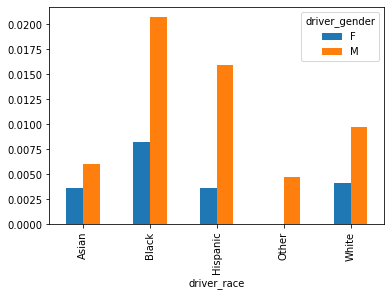

In [68]:
# Drugs related stop gender and race wise
drugs_gender_race = ri.pivot_table(index='driver_race', columns = 'driver_gender', values = 'drugs_related_stop')
print(drugs_gender_race)
drugs_gender_race.plot(kind='bar')

In [62]:
# stop length vs race
stop_length_race = ri.groupby('driver_race').stop_minutes.mean()
print(stop_length_race)

driver_race
Asian       11.001674
Black       12.577615
Hispanic    12.351804
Other       10.339623
White       11.537191
Name: stop_minutes, dtype: float64


driver_gender          F          M
driver_race                        
Asian          10.551724  11.136561
Black          11.459157  12.889838
Hispanic       11.062980  12.675585
Other           8.566038  10.783019
White          10.750270  11.873794


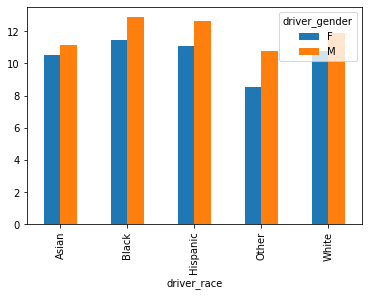

In [69]:
gender_race_stop_length = ri.pivot_table(index = 'driver_race', columns = 'driver_gender', values = 'stop_minutes')
print(gender_race_stop_length)
gender_race_stop_length.plot(kind='bar')